## Assignment: $k$ Means Clustering

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

The clusters decrease cause the scatter plots to be all over the place as the noise goes increases.


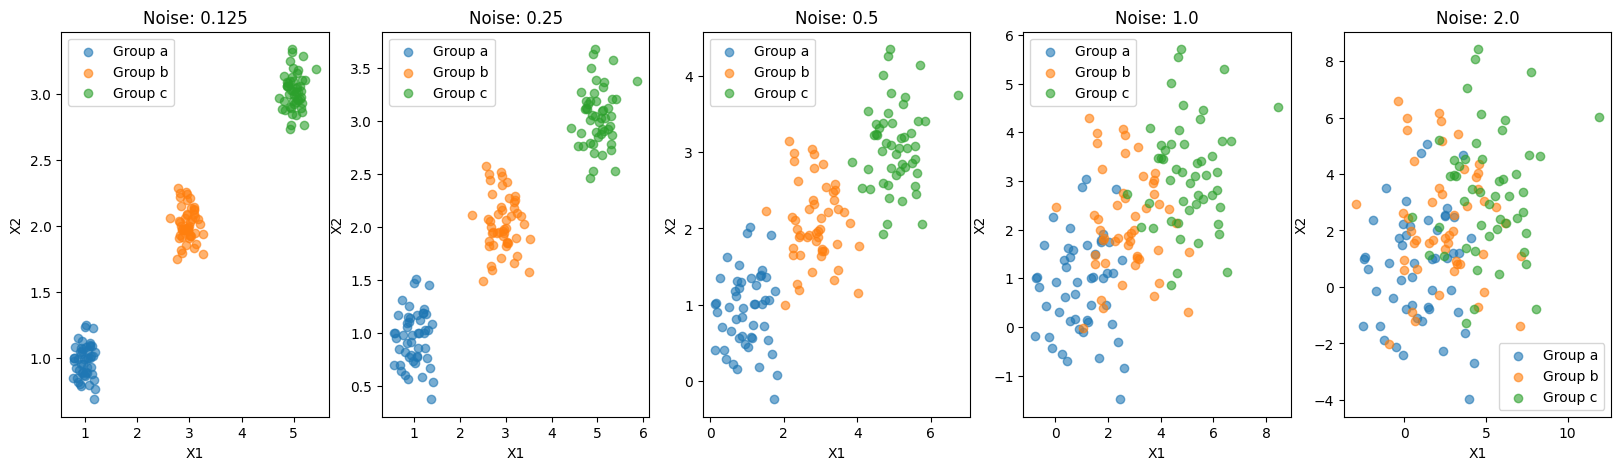

In [3]:
def plot_clusters(dfs, noise_levels):
    fig, axes = plt.subplots(1, len(dfs), figsize=(20, 5))

    for ax, df, noise in zip(axes, dfs, noise_levels):
        for group in df['group'].unique():
            subset = df[df['group'] == group]
            ax.scatter(subset['x1'], subset['x2'], label=f'Group {group}', alpha=0.6)

        ax.set_title(f'Noise: {noise}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.legend()

    plt.show()

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

plot_clusters([df0_125, df0_25, df0_5, df1_0, df2_0], [0.125, 0.25, 0.5, 1.0, 2.0])


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

There's more defined elbows due to the low noise data that cause very different clusters, so it's more easy to tell where the SEE levels are,

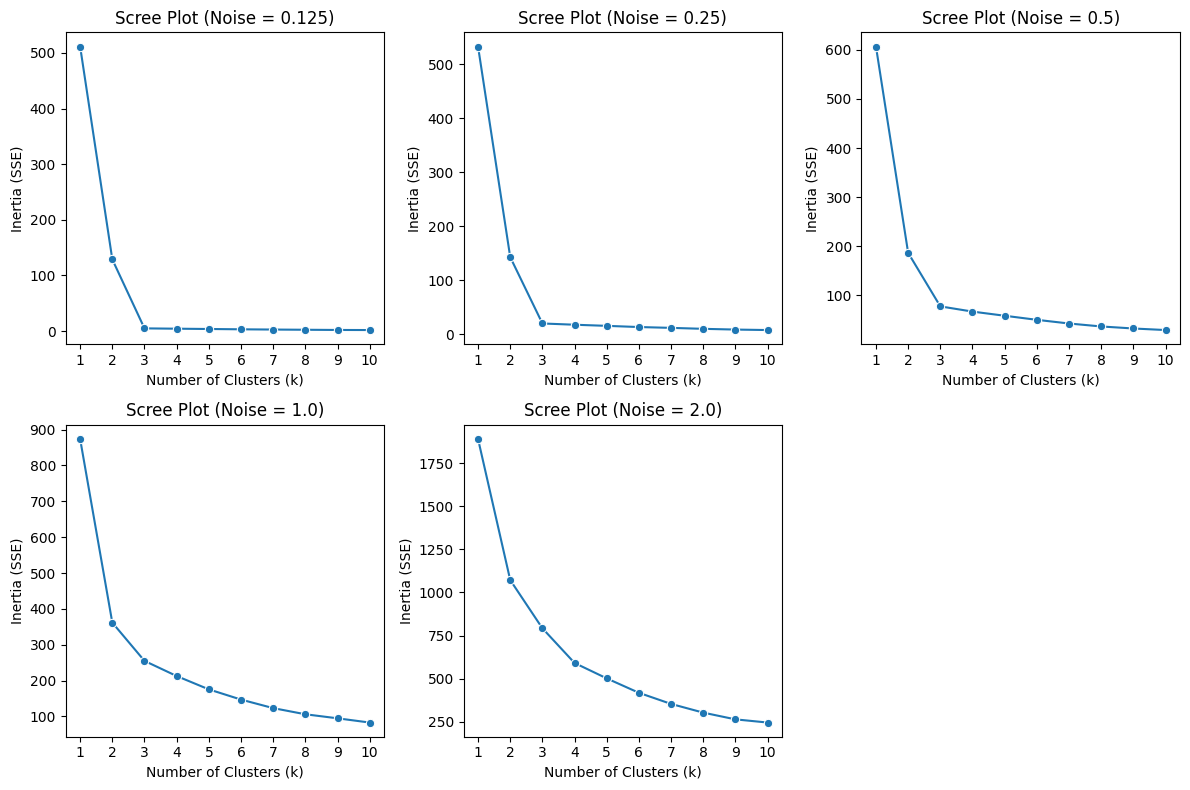

In [4]:
from sklearn.cluster import KMeans

datasets = {
    0.125: df0_125,
    0.25: df0_25,
    0.5: df0_5,
    1.0: df1_0,
    2.0: df2_0
}

k_max = 10

plt.figure(figsize=(12, 8))

for i, (noise_level, df) in enumerate(datasets.items(), 1):
    X = df[['x1', 'x2']].values
    sse = []

    for k in range(1, k_max + 1):
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        sse.append(model.inertia_)

    plt.subplot(2, 3, i)
    sns.lineplot(x=np.arange(1, k_max + 1), y=sse, marker="o")
    plt.title(f'Scree Plot (Noise = {noise_level})')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (SSE)')
    plt.xticks(range(1, k_max + 1))

plt.tight_layout()
plt.show()


4. Explain the intuition of the elbow, using this numerical simulation as an example.

Scree plot marks the point where adding more clusters stops significantly reducing inertia SSE are seen in the curve. The $k$ increased and then sharply decreases SSE as clusters started to better fit the data. However, after the sharper curve, further increases in $k$ yield only small SSE reductions, meaning the model has captured the key structure without unnecessary complexity.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?

In [13]:
df = pd.read_csv("SIPRI Military Expenditure Database.csv")

military_2020 = df[df['Year'] == 2020]
military_2020 = military_2020.dropna()\

# print(df2020.info())
# print(df2020.describe())
military_2020.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

duplicates = military_2020[military_2020.duplicated()]
# print(f"Found {duplicates.shape[0]} duplicate rows.")
# print(military_2020['country'].unique())

2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?

Some patterns I notice are National defense budgets and individual spending levels don't necessarily track together and the United States sticks out a bit, with the highest overall and per-person expenditures, forming its own separate grouping.
Other countries tend to cluster based mainly on per capita defense spending, as their total budgets are relatively similar.

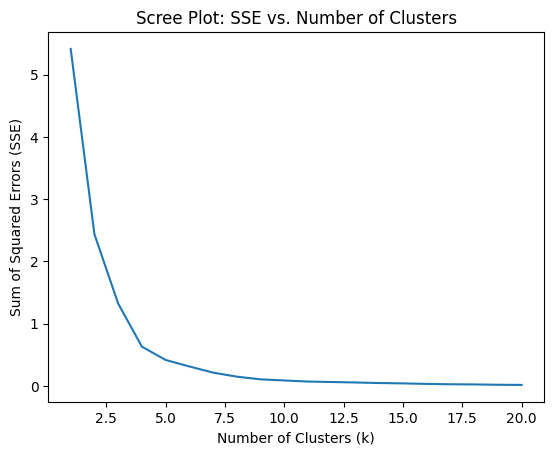

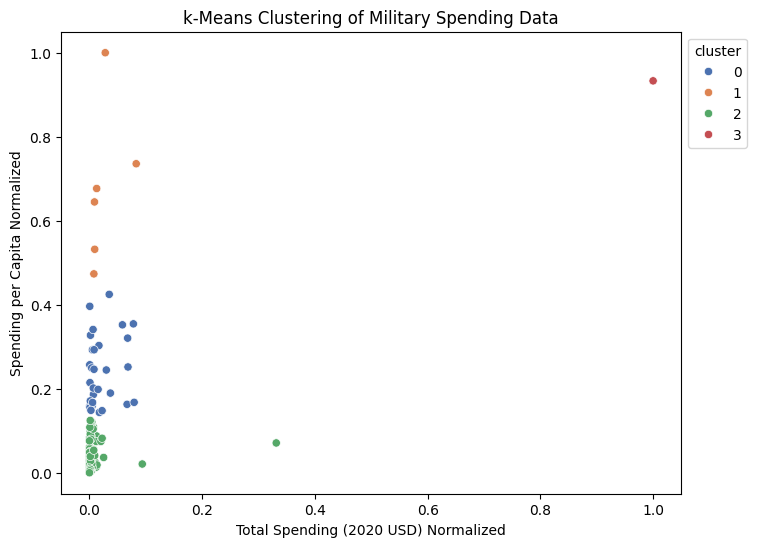

        total_spending_norm                                                   \
                      count      mean       std      min       25%       50%   
cluster                                                                        
0                      30.0  0.021929  0.026443  0.00051  0.002936  0.007514   
1                       6.0  0.024968  0.029370  0.00782  0.009012  0.011069   
2                     111.0  0.006232  0.032639  0.00000  0.000156  0.000480   
3                       1.0  1.000000       NaN  1.00000  1.000000  1.000000   

                            spending_capita_norm                      \
              75%       max                count      mean       std   
cluster                                                                
0        0.033772  0.079271                 30.0  0.240850  0.082121   
1        0.024215  0.082927                  6.0  0.677089  0.185083   
2        0.002940  0.331409                111.0  0.031542  0.033138   
3      

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define max-min scaler function
def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

military_data_2020 = military_2020.copy()
military_data_2020['total_spending_norm'] = maxmin(military_data_2020['spending_(2020_usd)'])
military_data_2020['spending_capita_norm'] = maxmin(military_data_2020['spending_per_capita'])
normalized_features = military_data_2020[['total_spending_norm', 'spending_capita_norm']]

sse = []
k_range = range(1, 21)
for k in k_range:
    kmeans_model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(normalized_features)
    sse.append(kmeans_model.inertia_)

sns.lineplot(x=list(k_range), y=sse)
plt.title('Scree Plot: SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
kmeans_model.fit(normalized_features)
military_data_2020['cluster'] = kmeans_model.predict(normalized_features)

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='total_spending_norm',
    y='spending_capita_norm',
    data=military_data_2020,
    hue='cluster',
    palette='deep'
)
plt.title('k-Means Clustering of Military Spending Data')
plt.xlabel('Total Spending (2020 USD) Normalized')
plt.ylabel('Spending per Capita Normalized')
sns.move_legend(scatter_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

cluster_summary = military_data_2020.groupby('cluster')[['total_spending_norm', 'spending_capita_norm']].describe()
print(cluster_summary)
us_cluster = military_data_2020[military_data_2020['country'] == 'United States of America']['cluster'].values[0]
print(f"United States is in cluster {us_cluster}")

3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?

Positive correlation for countries with more gov spending and higher GDP, clusters dont seem to be as different.

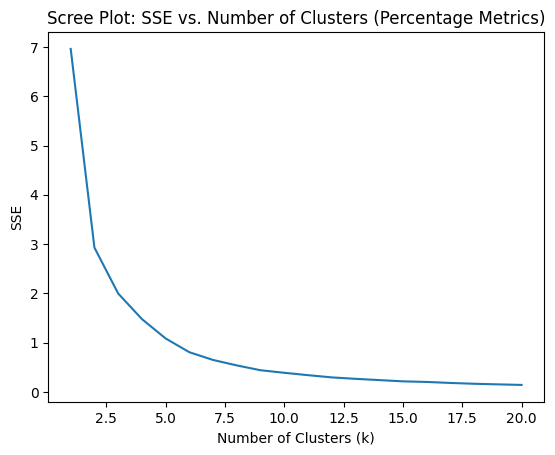

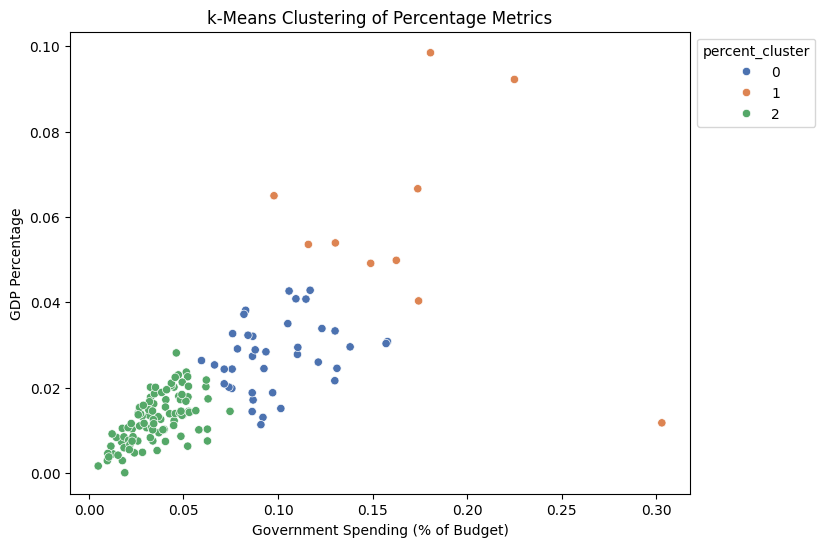

                percent_of_government_spending                                \
                                         count      mean       std       min   
percent_cluster                                                                
0                                         39.0  0.098683  0.024125  0.059520   
1                                         10.0  0.171289  0.058725  0.097882   
2                                         99.0  0.035777  0.014549  0.004896   

                                                        percent_of_gdp  \
                      25%       50%       75%       max          count   
percent_cluster                                                          
0                0.082430  0.092044  0.112633  0.157918           39.0   
1                0.135010  0.168248  0.179081  0.303027           10.0   
2                0.025921  0.034261  0.047402  0.074624           99.0   

                                                                          

In [18]:
# Extract and normalize the percentage metrics.
# After renaming, the columns are expected to be:
# 'percent_of_government_spending' and 'percent_of_gdp'
percent_metrics = military_data_2020[['percent_of_government_spending', 'percent_of_gdp']]
percent_metrics = percent_metrics.apply(maxmin)

# Scree plot: Evaluate k from 1 to 20 for percentage metrics
sse_percent = []
for k in range(1, 21):
    kmeans_model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(percent_metrics)
    sse_percent.append(kmeans_model.inertia_)

sns.lineplot(x=list(range(1, 21)), y=sse_percent)
plt.title('Scree Plot: SSE vs. Number of Clusters (Percentage Metrics)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose the optimal number of clusters (e.g., k=3 based on the elbow method)
optimal_k = 3
kmeans_percent = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
kmeans_percent.fit(percent_metrics)
military_data_2020['percent_cluster'] = kmeans_percent.predict(percent_metrics)

# Scatter plot for percentage metrics with cluster assignments
plt.figure(figsize=(8,6))
scatter_percent = sns.scatterplot(
    x='percent_of_government_spending',
    y='percent_of_gdp',
    data=military_data_2020,
    hue='percent_cluster',
    palette='deep'
)
plt.title('k-Means Clustering of Percentage Metrics')
plt.xlabel('Government Spending (% of Budget)')
plt.ylabel('GDP Percentage')
sns.move_legend(scatter_percent, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Descriptive statistics for each cluster based on percentage metrics
percent_cluster_summary = military_data_2020.groupby('percent_cluster')[['percent_of_government_spending', 'percent_of_gdp']].describe()
print(percent_cluster_summary)

# Identify the cluster for the United States based on percentage metrics
us_percent_cluster = military_data_2020[military_data_2020['country'] == 'United States of America']['percent_cluster'].values[0]
print(f"United States is in percent cluster {us_percent_cluster}")

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?

The clusters are more into accurate groups that are also precise.

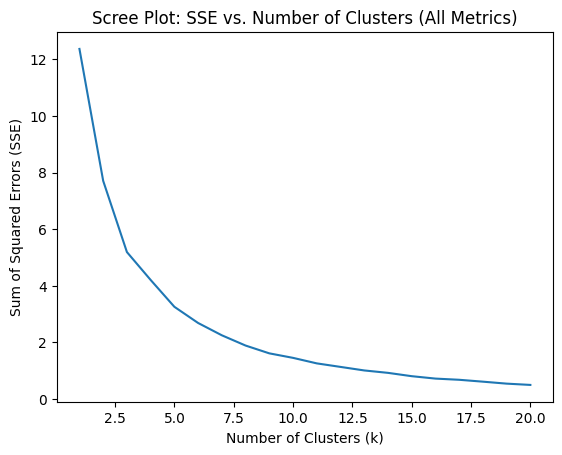

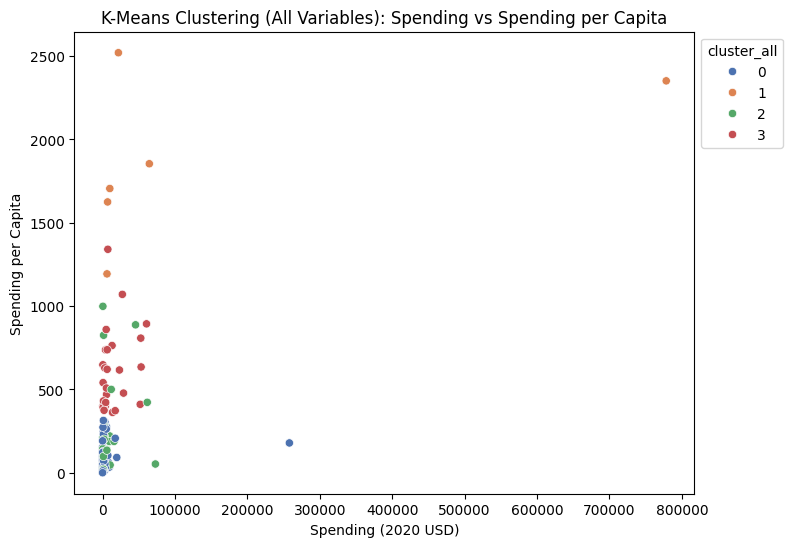

In [22]:
all_features = military_data_2020[['spending_(2020_usd)',
                                   'spending_per_capita',
                                   'percent_of_government_spending',
                                   'percent_of_gdp']]

all_features_norm = all_features.apply(maxmin)

sse_all = []
for k in range(1, 21):
    kmeans_model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(all_features_norm)
    sse_all.append(kmeans_model.inertia_)

sns.lineplot(x=list(range(1, 21)), y=sse_all)
plt.title('Scree Plot: SSE vs. Number of Clusters (All Metrics)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
kmeans_final.fit(all_features_norm)
military_data_2020['cluster_all'] = kmeans_final.predict(all_features_norm)

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    x='spending_(2020_usd)',
    y='spending_per_capita',
    data=military_data_2020,
    hue='cluster_all',
    palette='deep'
)
plt.title('K-Means Clustering (All Variables): Spending vs Spending per Capita')
plt.xlabel('Spending (2020 USD)')
plt.ylabel('Spending per Capita')
sns.move_legend(scatter_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

Yeah, voter segments help trends but obviously more context is needed.